# Theoretischer Hintergrund
Mithilfe von Natural Language Processing und Sentiment Analysis wird es Maschinen ermöglicht, menschliche Emotionen zu verstehen. Gerade für Unternehmen ist es wichtig, die allgemeine Wahrnehmung von Events (zum Beispiel der Launch eines neuen Produktes) zu verfolgen. Durch Echtzeit-Zugriff und die hohe Verfügbarkeit der Inhalte auf Twitter, Facebook oder anderen sozialen Netzwerken, können verschiedene Analysen der Posts durchgeführt werden.

## Natural Language Processing
Natural Language Processing (NLP) befasst sich mit der Verarbeitung großer Mengen natürlicher Sprache. Die Herausforderung besteht darin, dass Menschen unterschiedlich miteinander kommunizieren. Manchmal verwenden wir lange Sätze, manchmal kurze Sätze und manchmal wiederholen wir uns. Manchmal gibt es mehrere Wege, den gleichen Inhalt zu vermitteln, manchmal verwenden wir Synonyme.
Im nachfolgenden Kapitel wird gezeigt, wie man einfache Wortanalysen machen kann.

Um Beispiele durchzuführen, werden wir das Natural Language Toolkit ([NLTK](http://www.nltk.org/)) verwenden. Es ist standardmäßig in  Anaconda enthalten. Abgesehen vom Import des Toolkits müssen keine weiteren Schritte unternommen werden.

In [104]:
import nltk

Wir benötigen zunächst einige Testdatensätze, welche durch den Befehl `nltk.download()` heruntergeladen werden können. Im Popup Fenster kann man aussuchen, welche Datensätze heruntergeladen werden sollen. Für das nachfolgende Beispiel verwenden wir die Datensätze des `book` Pakets.

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

![NLTK-Downloader mit allen verfügbaren Datensätzen](NLTK_Downloader.png)
*Der NLTK-Downloader mit allen verfügbaren Datensätzen. Zum Herunterladen kann man das entsprechende Paket einfach doppelklicken. Wenn man fertig ist, kann man den Downloader über `File > Exit` verlassen.*

Nachdem die Pakete heruntergeladen wurden, können wir sie benutzen. Zuerst importieren wir die Bücher:

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Wenn die Texte erfolgreich eingelesen wurden, erhält man gleichzeitig eine Übersicht der geladenen Daten.

Man kann einen Text mit dem Befehl `concordance(str)` nach einem bestimmten Wort durchsuchen. Beispielsweise durchsuchen wir `text1` (Moby Dick) nach dem Wort *monstrous*:

In [14]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Die Methode `concordance()` gibt uns nun alle Passagen an, in denen das gesuchte Wort vorkommt. Es ist interessant zu sehen, dass das gleiche Wort je nach Kontext verschiedene Bedeutungen haben kann.

Im gleichen Zuge könnten Synonyme von *monstrous* in anderen Passagen verwendet worden sein, die für uns auch von Interesse wären. Dafür gibt es die Methode `similar()`: 

In [15]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [53]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Hier kann man klar erkennen, dass *monstrous* in Text 1 (Moby Dick) eher als negatives Wort verwendet wurde, wohingegen Text 2 es als eher positives Wort verwendet.

Man kann auch nach einem gemeinsamen Kontext zwischen 2 oder mehreren Wörtern suchen. Dabei ist es schlau, sich vorher die ähnlichen Wörter mit Hilfe des `similar` Befehls anzuschauen. Im nachfolgenden Beispiel suchen wir nach einem ähnlichen Kontext zwischen *monstrous* und *exceedingly* in Text 2. Dafür verwenden wir die Methode `common_contexts()`:

In [41]:
text2.common_contexts(["monstrous", "exceedingly"])

be_glad is_fond


Als Ergebnis erhalten wir die beiden Verben *to be glad* und *to be fond*

Neben der Analyse einzelner Wörter und deren Bedeutungen, können wir mit dem Toolkit auch den Ort der Wörter bestimmen. Nachfolgend finden Sie ein Beispiel mit den Wörtern *whale*, *monstrous* und *captain*. Die X-Achse stellt dabei die Länge (in Wörtern) des gesamten Textes dar und die vertikalen Striche eine Verwendung des entsprechenden Wortes:

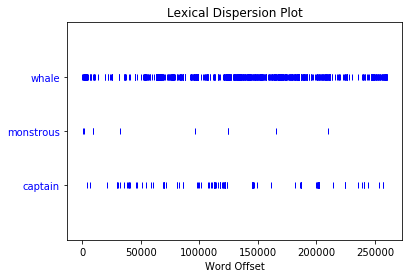

In [27]:
text1.dispersion_plot(["whale", "monstrous", "captain"])

Da die Texte sich in einem Array befinden, können wir mit Hilfe des `len()` Befehls die Länge des Textes in *Tokens* ausgeben lassen. Ein Token ist eine einzigartige Verkettung von Zeichen, also bildet sowohl jedes einzigartige Wort ein Token, als auch jedes einzigartige Satzzeichen.

In [46]:
len(text1)

260819

Mit dem Befehl `set` wird uns jedes Token nur einmal ausgegeben. Mit Hilfe von `sorted()` und `len()` können wir das Set sortieren lassen und die Anzahl der verschiedenen Tokens zählen lassen.

In [47]:
set(text1)

{'unforseen',
 'Cleveland',
 'REPEATED',
 'presuming',
 'roomy',
 'skewers',
 'GREENLAND',
 'hang',
 'advised',
 'numerous',
 'shouting',
 'credulities',
 'honeycombs',
 'same',
 'accumulated',
 'beaked',
 'initiate',
 'insulated',
 'essences',
 'equally',
 'Pantheon',
 'harmless',
 'Excuse',
 'unshunned',
 'fathers',
 'broiled',
 'Tisbury',
 'experiment',
 'spoke',
 'My',
 'giddily',
 'unwedded',
 'Moses',
 'intended',
 'swore',
 'bounded',
 'called',
 'Often',
 'indeed',
 'honed',
 'objection',
 'pains',
 'governor',
 'waistband',
 'Temple',
 'disembowelled',
 'ebony',
 'strength',
 'masted',
 'dream',
 'astonished',
 'nieces',
 'tails',
 'Fasting',
 'inveteracy',
 'actions',
 'dramatically',
 'marking',
 'remained',
 'crest',
 'destiny',
 'urged',
 'colonnades',
 'mocked',
 'commonplaces',
 'bigamist',
 'Junk',
 'tufted',
 'theory',
 'Thirty',
 'philosophy',
 'Somehow',
 '10',
 'Whale',
 'omen',
 'snorts',
 'wreck',
 'harpstring',
 'SIBBALD',
 'pan',
 'peak',
 'blending',
 'corroded

In [48]:
sorted(set(text1))

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

In [49]:
len(set(text1))

19317

Indem wir die Anzahl der Tokens durch die Gesamtlänge des Textes teilen, können wir herausfinden wie divers die Wortvielfalt des Textes ist. Bei Moby Dick sind 7,4% der Wörter einzigartig, was bedeutet dass jedes Wort im Schnitt 13-14 Mal im Text vorkommt.

In [50]:
len(set(text1)) / len(text1)

0.07406285585022564

Mit dem `count()` Befehl können wir die Anzahl eines bestimmten Tokens im Text ausgeben lassen.

In [51]:
text1.count("whale")

906

Es wäre noch interessant zu wissen, welche Tokens am häufigsten/seltensten verwendet werden. Das kann man über die *Frequency Distribution* herausfinden:

In [56]:
fdist = FreqDist(text1)

In [57]:
print(fdist)

<FreqDist with 19317 samples and 260819 outcomes>


In [63]:
fdist.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [65]:
fdist.most_common()[-50:]

[('buttress', 1),
 ('dislodged', 1),
 ('flume', 1),
 ('Diving', 1),
 ('unsurrendered', 1),
 ('uncracked', 1),
 ('bullied', 1),
 ('foregone', 1),
 ('comber', 1),
 ('unconquering', 1),
 ('grapple', 1),
 ('THUS', 1),
 ('voicelessly', 1),
 ('mutes', 1),
 ('bowstring', 1),
 ('bewildering', 1),
 ('mediums', 1),
 ('gaseous', 1),
 ('Fata', 1),
 ('Morgana', 1),
 ('infatuation', 1),
 ('lookouts', 1),
 ('animate', 1),
 ('inanimate', 1),
 ('whelmings', 1),
 ('intermixingly', 1),
 ('ironical', 1),
 ('coincidings', 1),
 ('backwardly', 1),
 ('tauntingly', 1),
 ('incommoding', 1),
 ('intercept', 1),
 ('etherial', 1),
 ('thrill', 1),
 ('Epilogue', 1),
 ('ONLY', 1),
 ('ESCAPED', 1),
 ('THEE', 1),
 ('halfspent', 1),
 ('suction', 1),
 ('closing', 1),
 ('Ixion', 1),
 ('Till', 1),
 ('liberated', 1),
 ('Buoyed', 1),
 ('dirgelike', 1),
 ('padlocks', 1),
 ('sheathed', 1),
 ('retracing', 1),
 ('orphan', 1)]

**Notiz:** Es gibt keine `least_common()` Funktion, jedoch gibt die Funktion `most_common` einen sortierten Array zurück, bei dem man sich einfach die X letzten Ergebnisse ausgeben lassen kann. Über diesen Umweg kann man sich die am seltensten verwendeten Tokens trotzdem anzeigen lassen.

Neben der Funktion, die häufigsten Wörter als Text auszugeben, bietet Frequency Distribution auch die Möglichkeit, einen Graphen mit den häufigsten X Wörtern auszugeben:

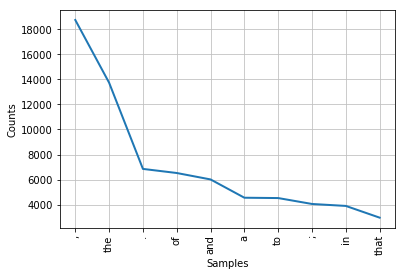

In [77]:
fdist.plot(10)

*Collocations* sind Wortsequenzen, die unverhältnismäßig oft miteinander verwendet werden. Eine ihrer Charakteristiken ist, dass sie normalerweise nicht austauschbar sind. Beispiel: *roter Wein* kann nicht durch *bordeauxroter Wein* ersetzt werden. Mithilfe des NLTK kann man sich auch eine Liste von collocations ausgeben lassen.

In [66]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [67]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


##### Einlesen von eigenen Daten
Natürlich kann man auch seine eigenen Daten einlesen. Im folgenden Beispiel lesen wir eine Textdatei ein

In [107]:
file = open("./excerpt.txt", 'r')
inputfile = file.read()
inputfile

'Theoretische Grundlagen\nAufgrund der Weiterentwicklung der Computernetzwerk Technologien werden immer mehr Angriffe auf Computernetze moeglich und durchgefuehrt. Diese Angriffe erfolgen hauptsaechlich durch die Ausnutzung unbekannter Schwachstellen (oder Bugs), welche in allen Systemen und Applikationen gefunden werden koennen. (Rui, Yongquan, & Mingjun, 2009)\nSchwachstelle\nAngreifer koennen durch das Ausnutzen einer Schwachstelle Zugriff auf Daten erhalten, auf die sie eigentlich nicht zugreifen duerfen. Je nach Art der Sicherheitsluecke koennen sie die Daten auch manipulieren. Ausserdem erlauben Schwachstellen haeufig die Interaktion mit weiterfuehrenden Systemen, wodurch Aktivitaeten ausgefuehrt werden, auf die der User oder Angreifer normalerweise keinen Zugriff hat. Falls die Applikation mit Administratorrechten ausgefuehrt wird, hat ein Angreifer vollen Zugriff auf die kompromittierte Maschine (Tan et al., 2014).\nEine Schwachstelle wird als Zero-Day Schwachstelle bezeichnet,

Die Datei wurde erfolgreich eingelesen, allerdings besteht sie im Moment noch aus einem einzelnen String. Um sie in Tokens aufzuteilen gibt es die Funktion `tokenize.word_tokenize()`. Anschließend müssen die Tokens noch in den Typ `nltk.text` transformiert werden:

In [122]:
tokens = nltk.tokenize.word_tokenize(inputfile)
type(tokens)

list

In [123]:
tokens = nltk.Text(tokens)
type(tokens)

nltk.text.Text

Ab jetzt können wir wie gewohnt mit den Tokens weiter arbeiten.

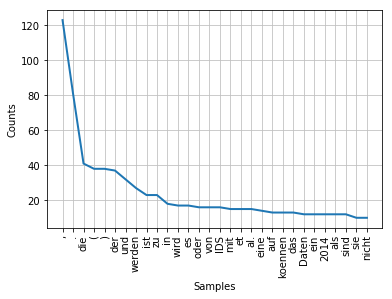

In [118]:
fd = nltk.FreqDist(tokens)
fd.plot(30)

Wir sehen, dass vor Allem Satzzeichen die Statistik verfälschen. Wir können sie herausfiltern, indem wir eine Mindestlänge von 2 Zeichen pro Token festlegen:

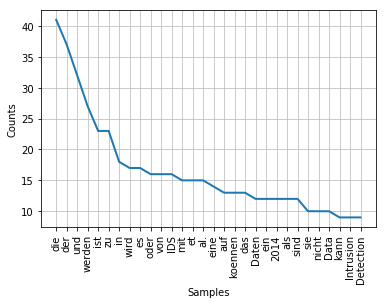

In [119]:
tokens_filtered = [i for i in tokens if (len(i) > 1)]
fd2 = nltk.FreqDist(tokens_filtered)
fd2.plot(30)

In [120]:
tokens.collocations()

Intrusion Detection; Big Data; Naive Bayes; Apache Spark; Support
Vector; Data Analyseverfahren; von Big; logistischen Regression;
Feature Variablen; Anomaly-Detection Systems; Laplace Glaettung; mit
Hilfe; Das Ziel; Hilfe von; Vector Machine; Bayes Verfahren;
Maschinellen Lernens; sehr gut; den Trainingsdatensatz; der
logistischen


## Sentiment Analysis
Sentiment (deutsch: Stimmung/Empfindung) Analysis, oder auch Opinion Mining genannt, ist eine Methode, mit welcher man versucht, die Stimmung einer Aussage oder die Emotionen dahinter zu bewerten. Die Aussage ist dabei weder an eine bestimmte Sprache gebunden, noch muss sie von einer bestimmten Quelle stammen. Man kann beispielsweise Tweets, Facebook Posts, Chatverläufe oder SMS verwenden. Im Gegensatz zum NLP werden nicht nur die Wörter bewertet, sondern die allgemeine Stimmung dahinter analysiert. Anhand der Wortwahl oder Zeichensetzung kann man erkennen, ob jemand genervt ist. 

Beispiele:
<table align=left><tr><td>Visiting to the wonderful places in Europe. Feeling real happy</td><td>Positiv</td></tr>
<tr><td>I love little sunshine in winters, make me feel live</td><td>Positiv</td></tr>
<tr><td>I am stuck in a same place, feeling sad</td><td>Negativ</td></tr>
<tr><td>The cab driver was a nice person. Think many of them are actualy good people</td><td>Positiv</td></tr></table>

Sentiment Analysis spielt eine wichtige Rolle, um die Kundenresonanz zu verstehen und kann den Wachstum eines Unternehmens stark beeinflussen. Mit Social Media Plattformen wie Facebook oder Twitter ist das Sprichwort *die Feder ist mächtiger als das Schwert* gegenwärtiger denn je. Mundpropaganda gilt als eines der stärksten Marketingmethoden, wodurch das Bedürfnis entstanden ist, Sentiment Analysen durchzuführen.
Das Feld ist inzwischen so fortgeschritten, dass man Ergebnisse größerer Wahlen durch Sentiment Analysen der Wähler ziemlich genau vorhersagen kann. Auf die gleiche Weise werden Entwicklungen des Aktienmarktes durchgeführt. 

### Schritte der Sentiment Analyse
Eine Meinung oder eine Stimmung kann einem Computer als Quintupel beschrieben werden.

**Quintupel**: ein 5-dimensionales Objekt mit den folgenden Achsen:
* $O$ beschreibt das *zu überprüfende Objekt*. Es wird durch named-entity recognition (Methode zur automatischen Identifizierung von Eigennamen) identifiziert (Beispiel: Barrack Obama; Volkswagen Golf)
* $f$ ist ein *Feature* von $O$. Es wird durch Datenverarbeitungsverfahren evaluiert
* $h$ ist der *information miner*
* $t$ ist der Zeitpunkt der Datenextraktion
* $SO$ ist die *Sentiment Orientation* des Information Miners $h$ mit dem Feature $f$ im Bezug auf das Objekt $O$  zum Zeitpunkt $t$. Der Wert der Sentiment Orientation ist entscheidend dafür, ob ein Objekt als positiv oder negativ eingestuft wird.

Um den Sentiment Value $SO$ zu berechnen, werden die folgenden Schritte durchgeführt:
1. Part-of-speech tagging (pos) bedeutet die Zuordnung von Wörtern oder Satzzeichen eines Objektes zu Wortarten. Hierbei werden sowohl  Definitionen des Wortes, als auch der Kontext berücksichtigt. Zur Durchführung werden Machine Learning Algorithmen verwendet. Eine Liste der verfügbaren Tags kann [hier](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) gefunden werden.
2. Wir betrachten die (SO) der gesammelten Objekte. Beispielsweise wurde *hervorragend* und *Handy* gesammelt, also eine positive Reaktion. Das Gegenteil könnte *schlechtes* + *Handy* sein. In dieser Phase versucht das System, die Begriffe eInzuordnen.
3. Die durchschnittliche Sentiment Orientation aller Begriffe wird zusammengerechnet, um beispielsweise folgende Aussagen zu treffen:
    1. "Normalerweise mögen Leute ihr neues Handy." → **positiv**
    2. "Normalerweise hassen Leute ihr neues Handy." → **nicht positiv**

**Zusatz:**
[SentiWordNet](http://sentiwordnet.isti.cnr.it/) ist eine Ressource des Opinion Minings, die die Sentiment Values eines englischen Datensatzes nach Positivität, Negativität und Objektivität, sowie die zugehörigen pos-Tags beinhaltet. Außerdem werden verschiedene Bedeutungen des gleichen Wortes unterschiedlich bewertet. Der SentiWordNet Datensatz kann ebenfalls über das NLTK heruntergeladen werden.

Beispiel:
* "Your new phone has 8gb of RAM? That's *crazy*! → crazy ist **positiv**
* "You bought a phone for &#36;1,200? You're *crazy*! → crazy ist **negativ**

Beispielsweise Naive Bayes als Klassifikator verwenden, um eine Sentiment Analysis durchzuführen

# Quellen:
* Ravindran & Garg (2015): *Mastering Social Media Mining with R*
* Richert & Coelho (2013): *Building Machine Learning Systems with Python*
* Bird, Klein & Loper: *Natural Language Processing with Python* ([Link](http://www.nltk.org/book/))
* http://www.nltk.org/
* https://de.wikipedia.org/wiki/Part-of-speech_Tagging
* https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
* http://sentiwordnet.isti.cnr.it/
* https://medium.com/udacity/natural-language-processing-and-sentiment-analysis-43111c33c27e